In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

url= 'http://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'


In [2]:
df= pd.read_csv(url)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [4]:
df.idno=df.idno.astype('int')
df.gndr=df.gndr.astype('object')

In [5]:
df= df.sort_values(by=['idno', 'year'])

In [6]:
df.shape

(8594, 13)

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [7]:
df.cntry.unique()

array(['ES', 'CH', 'SE', 'CZ', 'NO', 'DE'], dtype=object)

There are six countries in the study.

In [8]:
df.year.unique()

array([6, 7], dtype=int64)

year= 6 in 2012, year = 7 in 2014

In [9]:
df2 = df[['cntry', 'idno', 'year','ppltrst']]

In [10]:
df2= df2.dropna(subset=['ppltrst'])

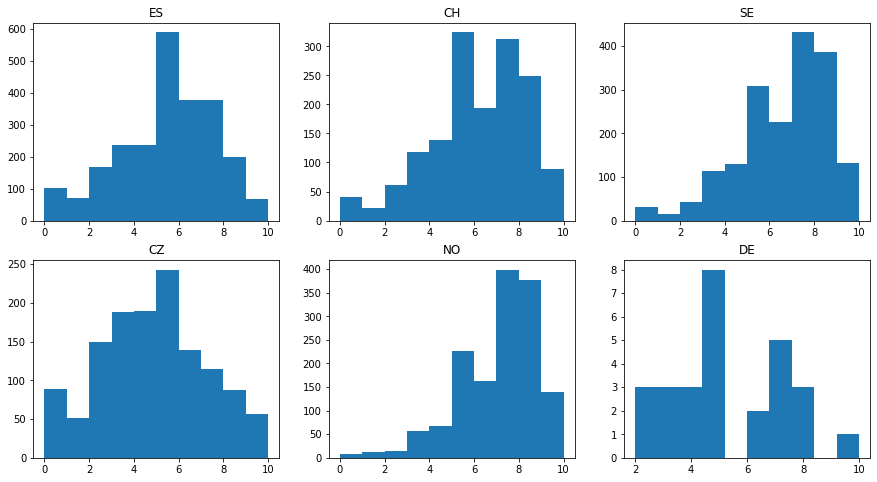

In [11]:
plt.figure(figsize=(15,8))

for i, country in enumerate(df2['cntry'].unique(), start = 1):
    plt.subplot(2, 3, i)
    plt.hist(df2[df2['cntry']==country].ppltrst.values)
    plt.title(country)
plt.show()

# f, axes = plt.subplots(3, 2, figsize=(7, 7))

# for country in df2['cntry'].unique():
#     sns.distplot(df2[df2['cntry']==country].ppltrst.values)

In [12]:
df2.groupby('cntry').ppltrst.describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,1546.0,5.714748,2.136931,0.0,5.0,6.0,7.0,10.0
CZ,1308.0,4.393731,2.357204,0.0,3.0,4.0,6.0,10.0
DE,28.0,5.285714,2.052228,2.0,4.0,5.0,7.0,10.0
ES,2424.0,5.004950,2.168314,0.0,4.0,5.0,7.0,10.0
NO,1460.0,6.623973,1.780359,0.0,5.0,7.0,8.0,10.0
SE,1814.0,6.158214,2.032498,0.0,5.0,7.0,8.0,10.0


In [13]:
print('trust in 2012')
df2[df2['year'] == 6].groupby('cntry').ppltrst.describe()

trust in 2012


,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,773.0,5.677878,2.130701,0.0,4.00,6.0,7.0,10.0
CZ,651.0,4.362519,2.409738,0.0,3.00,4.0,6.0,10.0
DE,14.0,5.214286,1.528125,3.0,4.25,5.0,6.5,8.0
ES,1213.0,5.114592,2.183623,0.0,4.00,5.0,7.0,10.0
NO,730.0,6.649315,1.749868,0.0,5.00,7.0,8.0,10.0
SE,906.0,6.058499,2.055554,0.0,5.00,7.0,8.0,10.0


In [14]:
print('trust in 2014')
df2[df2['year'] == 7].groupby('cntry').ppltrst.describe()

trust in 2014


,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,773.0,5.751617,2.143888,0.0,5.00,6.0,7.0,10.0
CZ,657.0,4.424658,2.305389,0.0,3.00,5.0,6.0,10.0
DE,14.0,5.357143,2.530039,2.0,3.25,5.5,7.0,10.0
ES,1211.0,4.895128,2.148165,0.0,3.00,5.0,6.0,10.0
NO,730.0,6.598630,1.811183,0.0,5.00,7.0,8.0,10.0
SE,908.0,6.257709,2.005422,0.0,5.00,7.0,8.0,10.0


## Using t test on ppltrst 2012 vs ppltrst 2014 in each country

In [15]:
for country in df2['cntry'].unique():
    print(country)
    print(stats.ttest_ind(df2[(df2['cntry'] == country) & (df2['year']==6)].ppltrst.values, 
                          df2[(df2['cntry'] == country) & (df2['year']==7)].ppltrst.values))
    print('------------------')


ES
Ttest_indResult(statistic=2.494276516716002, pvalue=0.012687599930326627)
------------------
CH
Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
------------------
SE
Ttest_indResult(statistic=-2.089164843127998, pvalue=0.03683208699520371)
------------------
CZ
Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626856563)
------------------
NO
Ttest_indResult(statistic=0.5437669865283744, pvalue=0.5866849635988214)
------------------
DE
Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
------------------


In 2014, People in ES are less trusting and people in SE are more trusting, compared to the people in their countries in 2012.  (p<0.05)

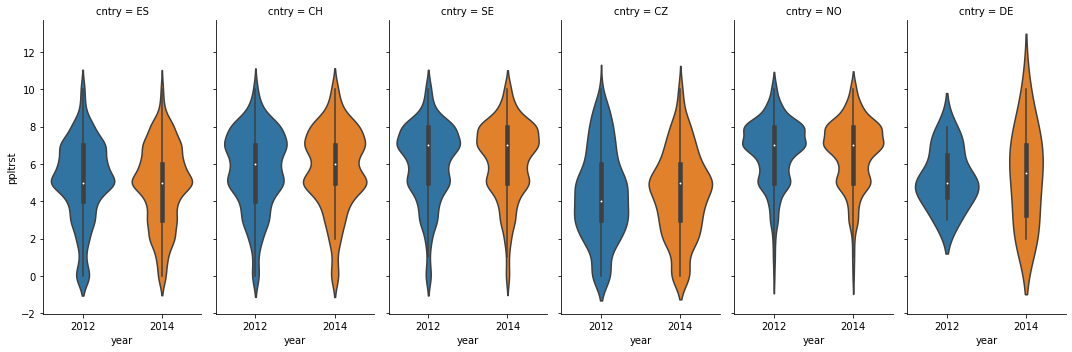

In [16]:
g= sns.catplot(x='year', y='ppltrst', col='cntry', kind='violin', data=df, aspect=0.5)
new_label=['2012', '2014']
g.set_xticklabels(new_label)
plt.show()

# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [17]:
df3 = df[['cntry', 'idno', 'year','happy']]
df3= df3.dropna()

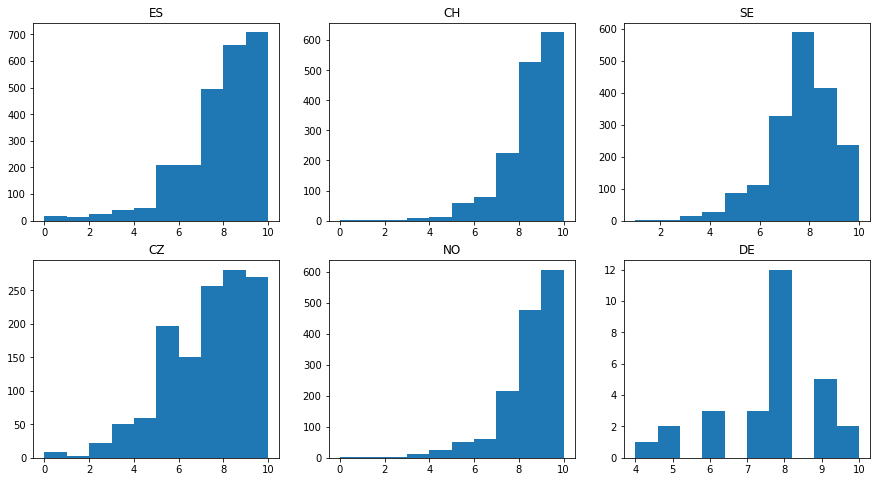

In [18]:
plt.figure(figsize=(15,8))

for i, country in enumerate(df3['cntry'].unique(), start = 1):
    plt.subplot(2, 3, i)
    plt.hist(df3[df3['cntry']==country].happy.values)
    plt.title(country)
plt.show()


In [19]:
print('happy in 2012')
df3[df3['year'] == 6].groupby('cntry').happy.describe()

happy in 2012


,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,770.0,8.088312,1.437920,0.0,7.00,8.0,9.0,10.0
CZ,646.0,6.770898,2.053582,0.0,5.00,7.0,8.0,10.0
DE,14.0,7.428571,1.650841,4.0,6.25,8.0,8.0,10.0
ES,1212.0,7.548680,1.913084,0.0,7.00,8.0,9.0,10.0
NO,727.0,8.251719,1.427270,0.0,8.00,8.0,9.0,10.0
SE,907.0,7.907387,1.521814,1.0,7.00,8.0,9.0,10.0


In [20]:
print('happy in 2014')
df3[df3['year'] == 7].groupby('cntry').happy.describe()

happy in 2014


,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,773.0,8.116429,1.405725,0.0,7.00,8.0,9.00,10.0
CZ,652.0,6.914110,1.902860,0.0,6.00,7.0,8.00,10.0
DE,14.0,7.857143,1.292412,5.0,7.25,8.0,8.75,10.0
ES,1212.0,7.419967,1.872315,0.0,7.00,8.0,9.00,10.0
NO,731.0,7.915185,1.581027,0.0,7.00,8.0,9.00,10.0
SE,905.0,7.946961,1.406155,3.0,7.00,8.0,9.00,10.0


## t-test on happy

In [21]:
for country in df3['cntry'].unique():
    print(country)
    print(stats.ttest_ind(df3[(df3['cntry'] == country) & (df3['year']==6)].happy.values, 
                          df3[(df3['cntry'] == country) & (df3['year']==7)].happy.values))
    print('------------------')


ES
Ttest_indResult(statistic=1.673984509948487, pvalue=0.09426276206929331)
------------------
CH
Ttest_indResult(statistic=-0.3883916732706544, pvalue=0.6977798552554684)
------------------
SE
Ttest_indResult(statistic=-0.5748685401292095, pvalue=0.5654516534862527)
------------------
CZ
Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243592707)
------------------
NO
Ttest_indResult(statistic=4.26539164981969, pvalue=2.1241259786815807e-05)
------------------
DE
Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)
------------------


In 2014, people in NO are less happy than in 2012.  (p<0.05)

# Who reported watching more TV in 2012, men or women?

In [22]:
df4 = df[['gndr', 'idno', 'year','tvtot']]
df4 = df4.dropna()

In [23]:
df4[df4['year']==6].groupby('gndr')['tvtot'].describe()

,count,mean,std,min,25%,50%,75%,max
gndr,,,,,,,,
1.0,2151.0,3.901906,1.983690,0.0,2.0,4.0,5.0,7.0
2.0,2140.0,3.944393,2.049457,0.0,2.0,4.0,6.0,7.0


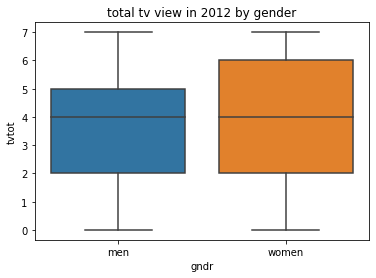

In [24]:
g=sns.boxplot(x='gndr', y='tvtot', data=df4[df4['year']==6])
new_label=['men', 'women']
g.set_xticklabels(new_label)
plt.title('total tv view in 2012 by gender')
plt.show()

In [25]:
print(stats.ttest_ind(df4[(df4['gndr'] == 1) & (df4['year']==6)].tvtot.values, 
                          df4[(df4['gndr'] == 2) & (df4['year']==6)].tvtot.values))

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)


There is no significant difference in TV viewing by men or by women in 2012.  

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [26]:
df5 = df[['year', 'pplfair', 'partner']]
df5 = df5.dropna()

In [27]:
df5[df5['year']==6].groupby('partner')['pplfair'].describe()

,count,mean,std,min,25%,50%,75%,max
partner,,,,,,,,
1.0,2663.0,6.080736,2.116945,0.0,5.0,7.0,8.0,10.0
2.0,1608.0,5.856965,2.162229,0.0,5.0,6.0,7.0,10.0


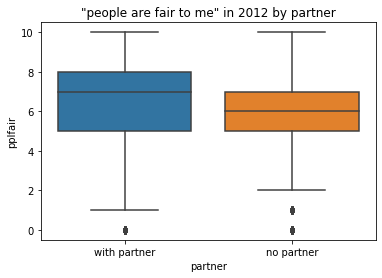

In [28]:
g=sns.boxplot(x='partner', y='pplfair', data=df5[df5['year']==6])
new_label=['with partner', 'no partner']
g.set_xticklabels(new_label)
plt.title('"people are fair to me" in 2012 by partner')
plt.show()

In [29]:
print(stats.ttest_ind(df5[(df5['partner'] == 1) & (df5['year']==6)].pplfair.values, 
                          df5[(df5['partner'] == 2) & (df5['year']==6)].pplfair.values))

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)


In 2012, people with partner believe in people are fair, compared to people living with no partner. 

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [30]:
df6 = df[['cntry','year','sclmeet']]
df6 = df6[df6['year']==7]
df6 = df6.dropna()

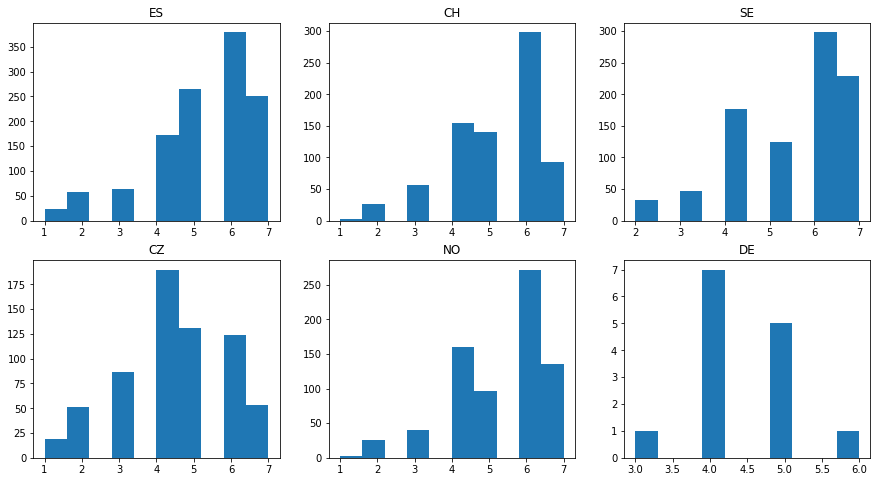

In [31]:
plt.figure(figsize=(15,8))

for i, country in enumerate(df6['cntry'].unique(), start = 1):
    plt.subplot(2, 3, i)
    plt.hist(df6[df6['cntry']==country].sclmeet.values)
    plt.title(country)
plt.show()

In [32]:
df6.groupby('cntry')['sclmeet'].describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,772.0,5.160622,1.308499,1.0,4.0,6.0,6.0,7.0
CZ,655.0,4.445802,1.481706,1.0,4.0,4.0,6.0,7.0
DE,14.0,4.428571,0.755929,3.0,4.0,4.0,5.0,6.0
ES,1211.0,5.260116,1.467855,1.0,4.0,6.0,6.0,7.0
NO,731.0,5.302326,1.347848,1.0,4.0,6.0,6.0,7.0
SE,908.0,5.426211,1.373098,2.0,4.0,6.0,7.0,7.0


Comparing CH, CZ, DE, SE four countries using Tukey's Honest Significant test

In [33]:
country_list = ['CH', 'CZ', 'DE', 'SE']

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


df6=df6[df6['cntry'].isin(country_list)]
socialmeet= np.asarray(df6.sclmeet)
country = np.asarray(df6.cntry)

tukey = pairwise_tukeyhsd(endog=socialmeet,   # Data
                          groups=country,     # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  



group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.7148,0.001,-0.9035,-0.5262,True
CH,DE,-0.7321,0.2015,-1.6896,0.2255,False
CH,SE,0.2656,0.001,0.0918,0.4394,True
CZ,DE,-0.0172,0.9,-0.9763,0.9419,False
CZ,SE,0.9804,0.001,0.7984,1.1624,True
DE,SE,0.9976,0.037,0.0414,1.9539,True


There are significant differences in CH vs CZ, CH vs SE, CZ vs SE, and DE vs SE.  DE and CZ are less sociable.  SE is very sociable. 

# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [35]:
df7 = df[['year', 'cntry', 'sclact']]
df7 = df7[df7['year']==7]
df7 = df7.dropna()

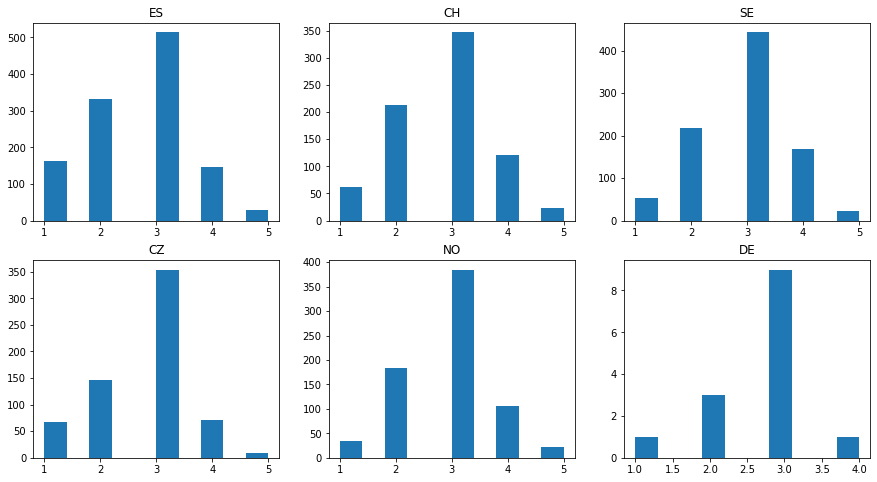

In [36]:
plt.figure(figsize=(15,8))

for i, country in enumerate(df7['cntry'].unique(), start = 1):
    plt.subplot(2, 3, i)
    plt.hist(df7[df7['cntry']==country].sclact.values)
    plt.title(country)
plt.show()

In [37]:
df7.groupby('cntry')['sclact'].describe()

,count,mean,std,min,25%,50%,75%,max
cntry,,,,,,,,
CH,765.0,2.781699,0.912783,1.0,2.00,3.0,3.0,5.0
CZ,650.0,2.703077,0.850717,1.0,2.00,3.0,3.0,5.0
DE,14.0,2.714286,0.726273,1.0,2.25,3.0,3.0,4.0
ES,1185.0,2.616878,0.953329,1.0,2.00,3.0,3.0,5.0
NO,731.0,2.859097,0.829662,1.0,2.00,3.0,3.0,5.0
SE,904.0,2.879425,0.861286,1.0,2.00,3.0,3.0,5.0


In [38]:
df7=df7[df7['cntry'].isin(country_list)]
socialact= np.asarray(df7.sclact)
country = np.asarray(df7.cntry)

tukey = pairwise_tukeyhsd(endog=socialact,   # Data
                          groups=country,     # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0786,0.3322,-0.1986,0.0414,False
CH,DE,-0.0674,0.9,-0.6741,0.5392,False
CH,SE,0.0977,0.1045,-0.0128,0.2082,False
CZ,DE,0.0112,0.9,-0.5964,0.6188,False
CZ,SE,0.1763,0.001,0.0607,0.292,True
DE,SE,0.1651,0.8918,-0.4407,0.771,False


In 2014, There is significant difference between CZ and SE in how often people took part in their social activities, relative to people at their age.  